In [71]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv

import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
#matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


df1 = pd.read_csv(os.path.join(os.getcwd(),'data/sakai_train.tsv'), delim_whitespace=True)

In [72]:
a = df1.groupby(['Gesture',"Trial_id"]).mean()
a.reset_index()

df = pd.DataFrame()

df["Volt"] = a.Volt
df.Length = df1.Length



In [73]:
X = pd.DataFrame([df.query("Gesture==90").Volt.mean()
                  ,df.query("Gesture==0").Volt.mean()])
min = 0
max = df.Length.mean()
y = pd.DataFrame([min,max])


In [74]:
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
regr.fit(X, y)
y_fit = regr.predict(X)


In [75]:
dist_func = lambda x: x * regr.coef_ + regr.intercept_
df["Dist"] = df["Volt"].map(dist_func)
df["Dist"] = df["Dist"].values
df["Dist"] = df["Dist"].map(lambda x : min if x < min else (max if x > max else x))


In [76]:
import math
df["Theta"] = df["Dist"].map(lambda x : math.degrees(math.acos(x/df.Length[0])))
df["SquareTheta"] = df["Theta"].map(lambda x : x*x/90)


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


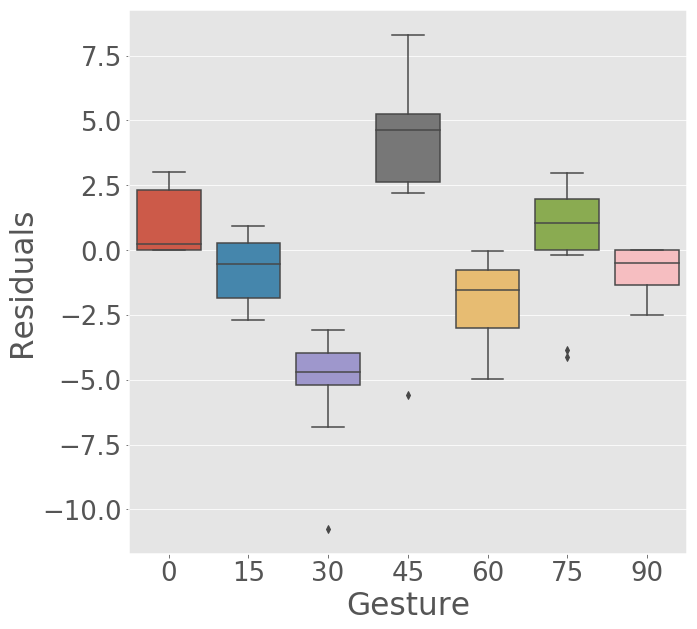

In [77]:
df = df.reset_index(level='Gesture')
df["Residuals"] = df.SquareTheta - df.Gesture
sns.boxplot(x="Gesture",y="Residuals",data=df)


[[1.         0.99423888]
 [0.99423888 1.        ]]


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


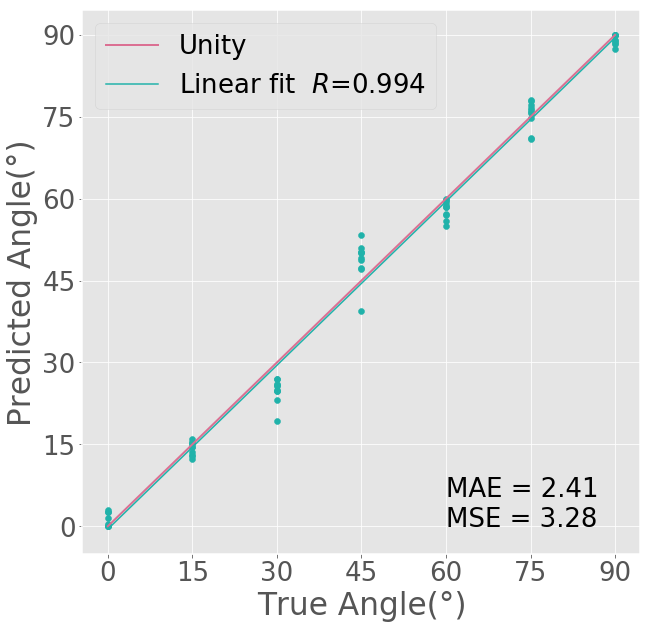

In [78]:
cols = ['Gesture', 'SquareTheta']
corr = np.corrcoef(df[cols].values.T)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(df.SquareTheta, df.Gesture)
mse = np.sqrt(mean_squared_error(df.SquareTheta, df.Gesture))

print(corr)

plt.scatter(df.Gesture, df.SquareTheta, c = 'lightseagreen',
            marker = 'o',label = None)
plt.ylabel('Predicted Angle(°)')
plt.xlabel('True Angle(°)')


x = np.arange(0,91,1)
y = x
plt.plot(x,y,lw = 2, color = 'palevioletred', label = "Unity")



X = df.Gesture.reshape(-1,1)
y = df.SquareTheta.reshape(-1,1)

cols = ['Gesture', 'SquareTheta']
corr = np.corrcoef(df[cols].values.T)

regr = LinearRegression()
regr = regr.fit(X, y)
y_fit = regr.predict(X)
plt.plot(X,y_fit,color = 'lightseagreen',label = 'Linear fit  $R$=%.3f'%(corr[1,0:1]))
         #\n $R^2$ = %.2f\nMAE = %.1f\nMSE = %.1f' %(corr[1,0:1],mae,mse))
plt.text(60, 0, 'MAE = %.2f\nMSE = %.2f' %(mae,mse))
plt.legend(loc = 'upper left')
plt.xticks(np.arange(0, 100, 15))
plt.yticks(np.arange(0, 100, 15))
plt.show()


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


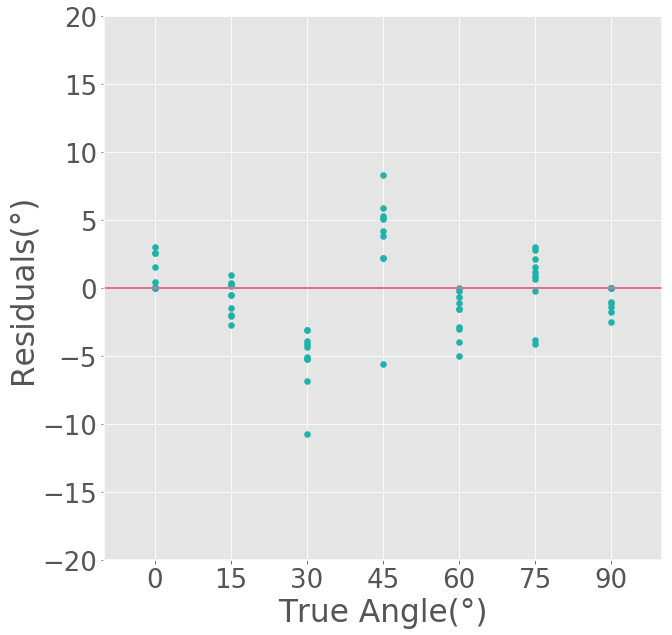

In [79]:
plt.scatter(df.Gesture, df.SquareTheta - df.Gesture  , c = 'lightseagreen', marker = 'o')
#,label = 'MAE=%.2f\nMSE=%.2f' %(mae,mse))
plt.xlabel('True Angle(°)')
plt.ylabel('Residuals(°)')
plt.legend()
#plt.text(75, 0, '$R^2$ = %.2f\nMAE = %.1f\nMSE = %.1f' %(corr[1,0:1],mae,mse))
plt.hlines(y = 0, xmin = -10, xmax = 100, lw = 2, color = 'palevioletred')
plt.xlim([-10, 100])
plt.ylim([-20,20])
plt.xticks(np.arange(0, 100, 15) )
plt.show()